# Non-Nested and Nested Cross Validation on Iris Dataset

In [1]:
# import the libraries
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
%matplotlib inline

In [3]:
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
# Number of random trials
NUM_TRIALS = 30

In [5]:
# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [6]:
X_iris[0:5], y_iris[0:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]), array([0, 0, 0, 0, 0]))

In [7]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
len(y_iris)

150

In [9]:
len(X_iris)

150

In [10]:
X_df = pd.DataFrame(X_iris)

In [11]:
X_df.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


In [12]:
X_df[0].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: 0, dtype: float64

In [13]:
X_iris[0], X_iris[1]

(array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]))

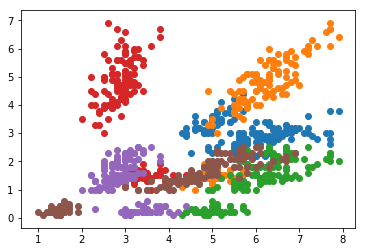

In [14]:
plt.scatter(X_df[0], X_df[1])
plt.scatter(X_df[0], X_df[2])
plt.scatter(X_df[0], X_df[3])
plt.scatter(X_df[1], X_df[2])
plt.scatter(X_df[1], X_df[3])
plt.scatter(X_df[2], X_df[3])

LinregressResult(slope=-0.057268233797164766, intercept=3.3886373794880997, rvalue=-0.10936924995064928, pvalue=0.18276521527137013, stderr=0.04278333177695658)

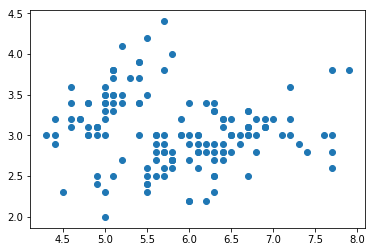

In [15]:
plt.scatter(X_df[0], X_df[1])
linregress(X_df[0], X_df[1])

LinregressResult(slope=1.857509665421445, intercept=-7.095381478279311, rvalue=0.8717541573048712, pvalue=1.0384540627941475e-47, stderr=0.08581283468676192)

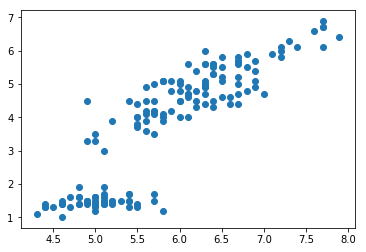

In [16]:
plt.scatter(X_df[0], X_df[2])
linregress(X_df[0], X_df[2])

LinregressResult(slope=0.7538408835092413, intercept=-3.2062768959723336, rvalue=0.8179536333691635, pvalue=2.314849151272839e-37, stderr=0.04358153799645877)

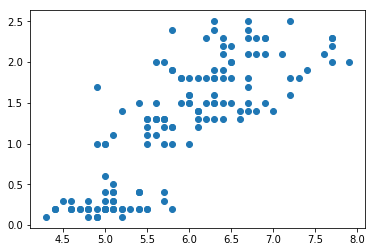

In [17]:
plt.scatter(X_df[0], X_df[3])
linregress(X_df[0], X_df[3])

LinregressResult(slope=-1.7112013879468524, intercept=8.984675705456354, rvalue=-0.4205160964011545, pvalue=8.42936639295021e-08, stderr=0.3034809326016925)

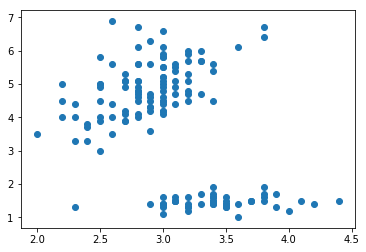

In [18]:
plt.scatter(X_df[1], X_df[2])
linregress(X_df[1], X_df[2])

LinregressResult(slope=-0.6275461756495291, intercept=3.115192687100329, rvalue=-0.35654408961380574, pvalue=7.5238909560675414e-06, stderr=0.1351692617819254)

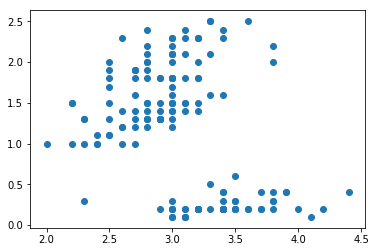

In [19]:
plt.scatter(X_df[1], X_df[3])
linregress(X_df[1], X_df[3])

LinregressResult(slope=0.4164191322854009, intercept=-0.3665140452167266, rvalue=0.9627570970509659, pvalue=5.776660988498995e-86, stderr=0.009612539319328631)

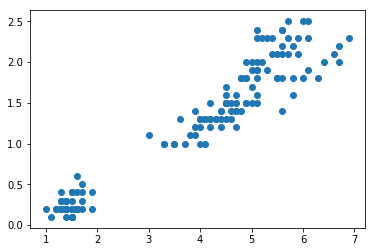

In [20]:
plt.scatter(X_df[2], X_df[3])
linregress(X_df[2], X_df[3])

In [21]:
# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

In [22]:
# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf", random_state=143)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
X_train, X_test = train_test_split(X_df, test_size=0.2)

In [24]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [25]:
y_train, y_test = train_test_split(y_iris, test_size=0.2)

In [26]:
y_train.shape, y_test.shape

((120,), (30,))

In [27]:
svm1 = SVC(kernel='linear', degree=1, random_state=143)
svm1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
clf1 = GridSearchCV(estimator=svm1, param_grid=p_grid,)
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
clf1.best_score_

0.39166666666666666

In [30]:
svm2 = SVC(kernel='linear', degree=2, random_state=143)
svm2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
clf2 = GridSearchCV(estimator=svm2, param_grid=p_grid,)
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
clf2.best_score_

0.39166666666666666

In [33]:
svm3 = SVC(kernel='linear', degree=3, random_state=143)
svm3

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
clf3 = GridSearchCV(estimator=svm3, param_grid=p_grid,)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
clf3.best_score_

0.39166666666666666

In [36]:
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In nested cross-validation, we have an outer k-fold cross-validation loop to split the data into training and test folds, and an inner loop is used to select the model via k-fold cross-validation on the training fold. After model selection, the test fold is then used to evaluate the model performance. After we have identified our “favorite” algorithm, we can follow-up with a “regular” k-fold cross-validation approach (on the complete training set) to find its “optimal” hyperparameters and evaluate it on the independent test set.

To avoid this problem, nested CV effectively uses a series of train/validation/test set splits. In the inner loop (here executed by GridSearchCV), the score is approximately maximized by fitting a model to each training set, and then directly maximized in selecting (hyper)parameters over the validation set. In the outer loop (here in cross_val_score), generalization error is estimated by averaging test set scores over several dataset splits.

The example below uses a support vector classifier with a non-linear kernel to build a model with optimized hyperparameters by grid search. We compare the performance of non-nested and nested CV strategies by taking the difference between their scores.

In [37]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))


Average difference of 0.007742 with std. dev. of 0.007688.


In [38]:
nested_scores

array([0.94683499, 0.94683499, 0.97297297, 0.9601707 , 0.95999289,
       0.96692745, 0.96657183, 0.9601707 , 0.96034851, 0.96639403,
       0.9601707 , 0.96674964, 0.95999289, 0.97332859, 0.96674964,
       0.96639403, 0.9735064 , 0.95999289, 0.96639403, 0.9735064 ,
       0.95963727, 0.98684211, 0.95359175, 0.97332859, 0.97332859,
       0.95359175, 0.95981508, 0.98008535, 0.98008535, 0.98008535])

In [39]:
non_nested_scores

array([0.96      , 0.96      , 0.97333333, 0.96666667, 0.97333333,
       0.98      , 0.97333333, 0.97333333, 0.97333333, 0.97333333,
       0.98      , 0.96666667, 0.97333333, 0.98      , 0.98      ,
       0.97333333, 0.97333333, 0.97333333, 0.97333333, 0.98      ,
       0.98      , 0.98666667, 0.96      , 0.96666667, 0.97333333,
       0.98      , 0.96666667, 0.98      , 0.97333333, 0.98      ])

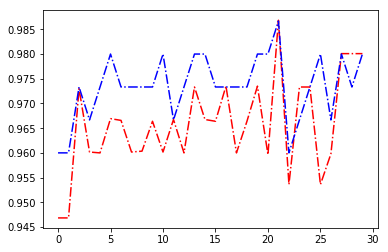

In [40]:
plt.plot(nested_scores, 'r-.')
plt.plot(non_nested_scores, 'b-.')

-----------------


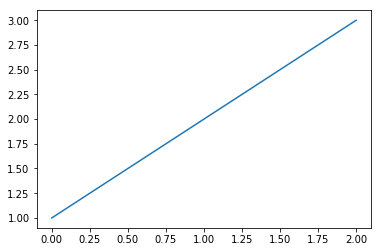

In [41]:
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3])


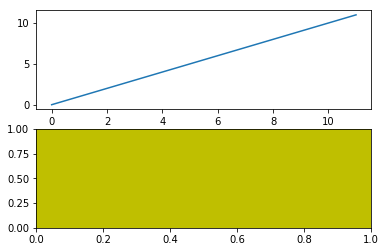

In [42]:
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y') # creates 2nd subplot with yellow background

Text(0,0.5,'score difference')

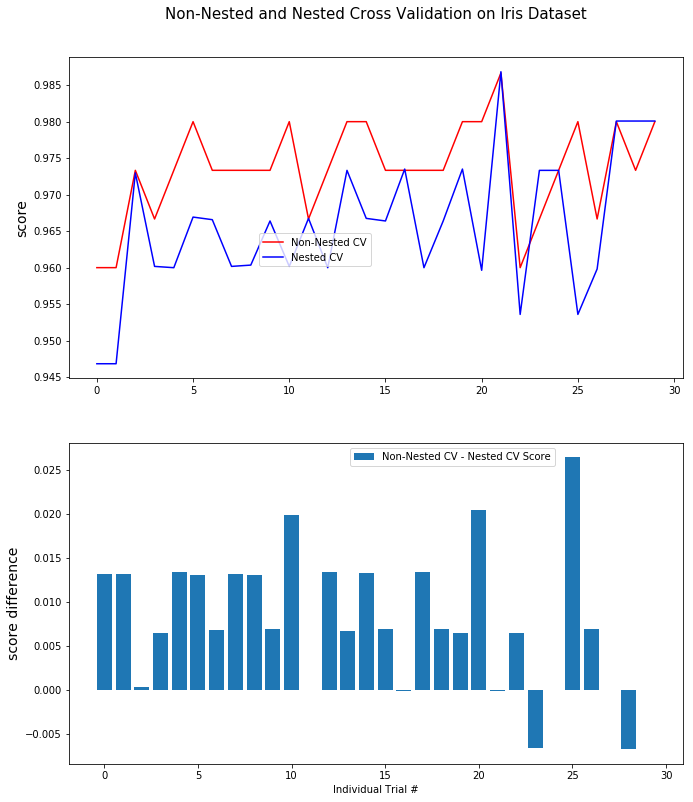

In [43]:
# Plot scores on each trial for nested and non-nested CV
plt.figure(figsize=(11,13))
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")